In [91]:
# Importing Important Libraries

import numpy as np # for mathematical computation
import pandas as pd # for dealing with the data
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization
%matplotlib inline

In [92]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [93]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Region_Code          245725 non-null  object
 4   Occupation           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Credit_Product       216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [94]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ID                   105312 non-null  object
 1   Gender               105312 non-null  object
 2   Age                  105312 non-null  int64 
 3   Region_Code          105312 non-null  object
 4   Occupation           105312 non-null  object
 5   Channel_Code         105312 non-null  object
 6   Vintage              105312 non-null  int64 
 7   Credit_Product       92790 non-null   object
 8   Avg_Account_Balance  105312 non-null  int64 
 9   Is_Active            105312 non-null  object
dtypes: int64(3), object(7)
memory usage: 8.0+ MB


In [95]:
train.head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [96]:
test.head()

ID  Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0  VBENBARO    Male   29       RG254      Other           X1       25   
1  CCMEWNKY    Male   43       RG268      Other           X2       49   
2  VK3KGA9M    Male   31       RG270   Salaried           X1       14   
3  TT8RPZVC    Male   29       RG272      Other           X1       33   
4  SHQZEYTZ  Female   29       RG270      Other           X1       19   

  Credit_Product  Avg_Account_Balance Is_Active  
0            Yes               742366        No  
1            NaN               925537        No  
2             No               215949        No  
3             No               868070        No  
4             No               657087        No

In [97]:
# Let's see a statistical summary of the numerical columns in the train and test dataset.

train.describe()

Age        Vintage  Avg_Account_Balance        Is_Lead
count  245725.000000  245725.000000         2.457250e+05  245725.000000
mean       43.856307      46.959141         1.128403e+06       0.237208
std        14.828672      32.353136         8.529364e+05       0.425372
min        23.000000       7.000000         2.079000e+04       0.000000
25%        30.000000      20.000000         6.043100e+05       0.000000
50%        43.000000      32.000000         8.946010e+05       0.000000
75%        54.000000      73.000000         1.366666e+06       0.000000
max        85.000000     135.000000         1.035201e+07       1.000000

In [98]:
test.describe()

Age        Vintage  Avg_Account_Balance
count  105312.000000  105312.000000         1.053120e+05
mean       43.871002      46.842819         1.134195e+06
std        14.872890      32.273634         8.662430e+05
min        24.000000       7.000000         2.259700e+04
25%        30.000000      20.000000         6.039822e+05
50%        43.000000      32.000000         8.966345e+05
75%        54.000000      73.000000         1.371598e+06
max        85.000000     135.000000         9.908858e+06

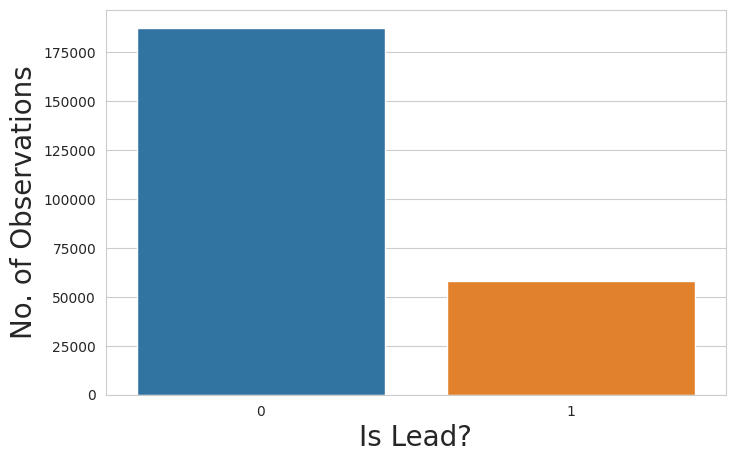

In [99]:
#to check the class imbalance
ax = plt.subplots(figsize=(8, 5))
sns.set_style("whitegrid")
sns.countplot(x='Is_Lead', data=train);
plt.ylabel("No. of Observations", size=20);
plt.xlabel("Is Lead?", size=20);

0    187437
1     58288
Name: Is_Lead, dtype: int64


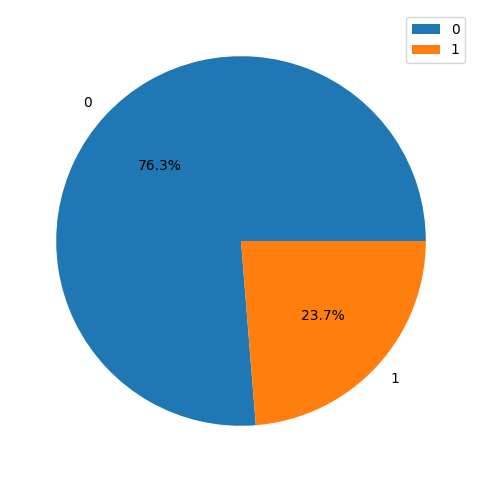

In [15]:
plt.figure(figsize = (10,6))
print(train['Is_Lead'].value_counts())
plt.pie(train['Is_Lead'].value_counts(), labels = ['0','1'], autopct='%.1f%%')
plt.legend()
plt.show()

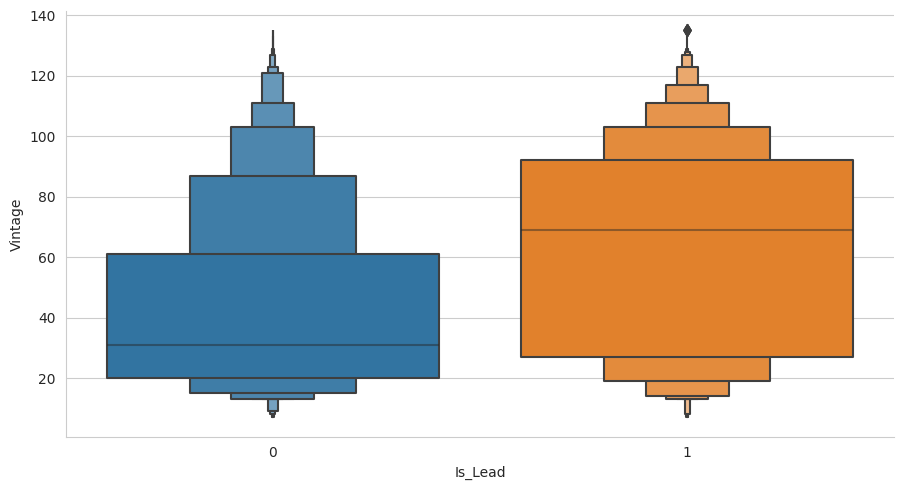

In [101]:
#Vintage analysis
g = sns.catplot(x='Is_Lead', y='Vintage', kind='boxen', data=train);
g.fig.set_size_inches(10,5)

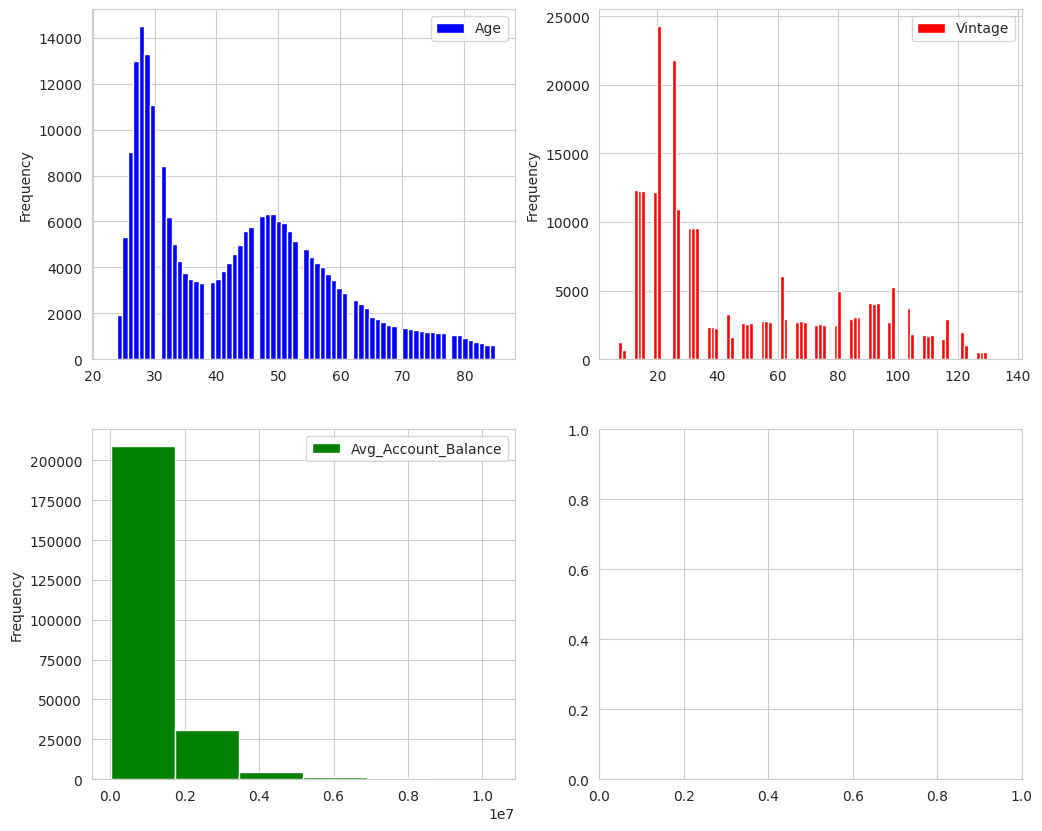

In [102]:

# Lets do some Exploratory data analysis for the insights in the data
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,10))
train.plot(kind='hist',y='Age',bins=70,color='b',ax=axes[0][0])
train.plot(kind='hist',y='Vintage',bins=100,color='r',ax=axes[0][1])
train.plot(kind='hist',y='Avg_Account_Balance',bins=6,color='g',ax=axes[1][0])
plt.show()

The dataset is quite imbalanced as 76% of customers are not interested in Credit card and 24% are interested

<Axes: xlabel='Credit_Product', ylabel='count'>

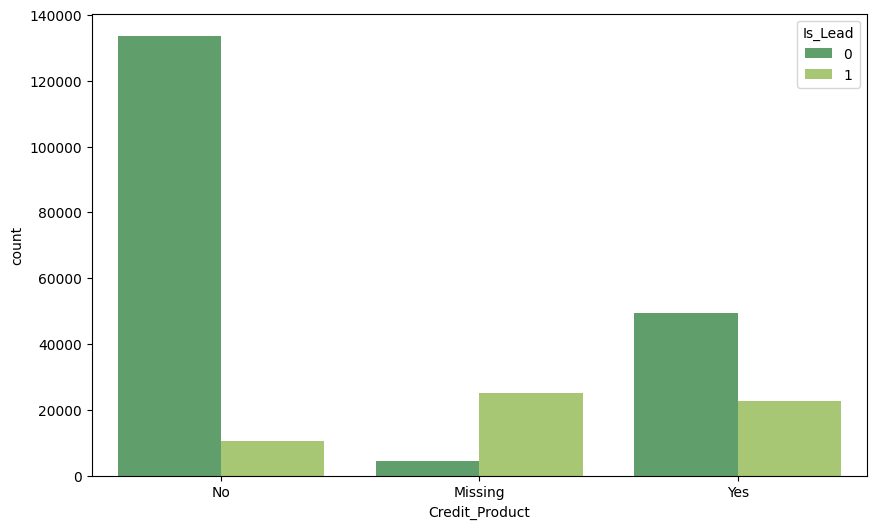

In [16]:
#As EDA has been done in Module 2 we will explore the uncertainity and impact of the features which would have on our model.
# Credit product missing values
plt.figure(figsize = (10,6))
sns.countplot(data=train.fillna('Missing'), x='Credit_Product', hue='Is_Lead', palette='summer')


Here we can observe that the missing values actually have more leads than yes. Thus we should fill the missing values.

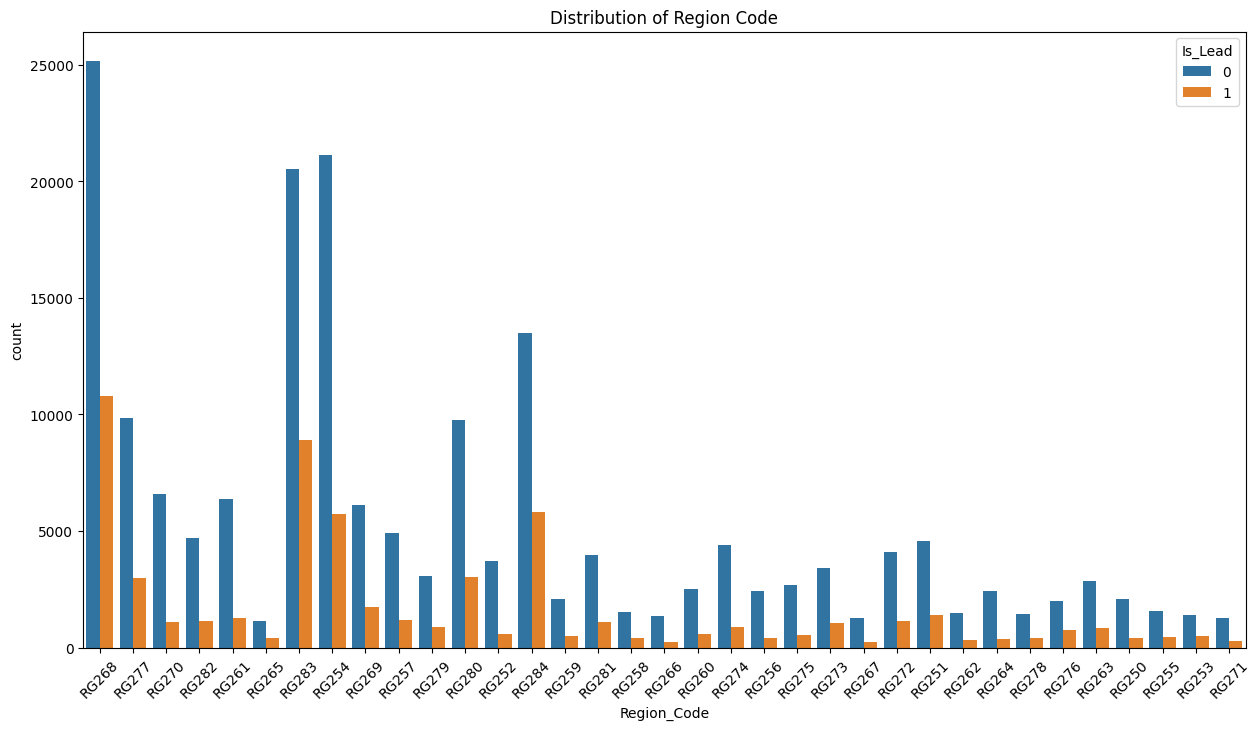

In [17]:
# Region_Code : Code of the Region for the customers

plt.figure(figsize=(15,8))
ax = sns.countplot(x=train.Region_Code, hue=train.Is_Lead)
ax.set_title('Distribution of Region Code')
plt.xticks(rotation=45)
plt.show()

Each region has differnt trend

Dummy Encoding of Region Code will increase complexity of Model and also preformance will be lowered

Will use Lead Probabilty Score of each region instead of categories.

probability_score = no_of_leads_in_region / no_of_customers_in_region

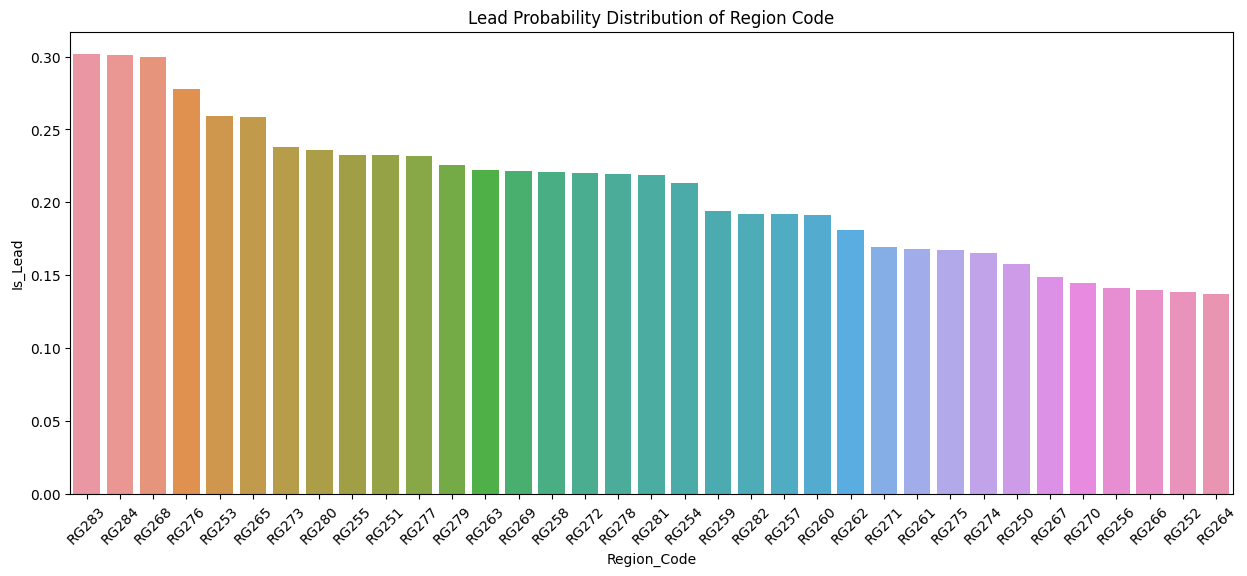

In [18]:
rc_encoding = train.groupby('Region_Code')['Is_Lead'].mean().reset_index()

plt.figure(figsize=(15,6))
ax = sns.barplot(x='Region_Code', y='Is_Lead', data=rc_encoding.sort_values(by=['Is_Lead'], ascending=False));
ax.set_title('Lead Probability Distribution of Region Code')
plt.xticks(rotation=45)
plt.show()

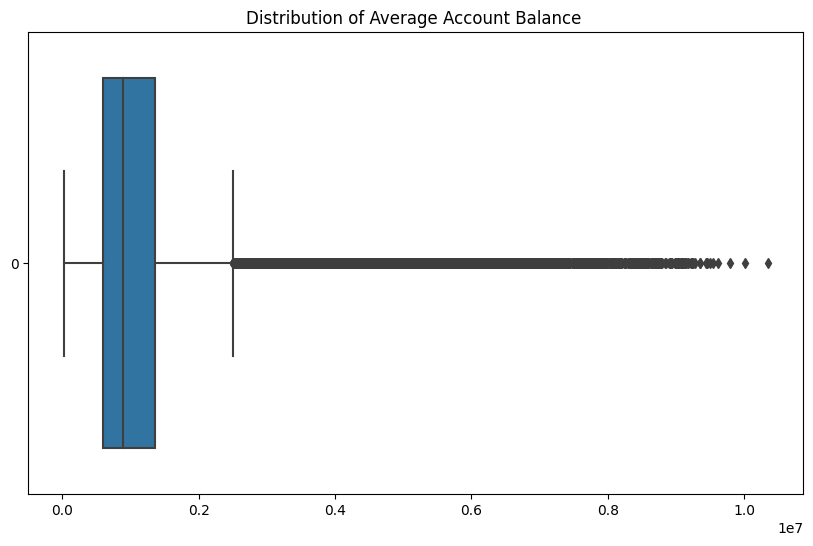

In [19]:
#outliers in Average account balance
plt.figure(figsize=(10,6))
ax = sns.boxplot(train.Avg_Account_Balance, orient = 'h')
ax.set_title('Distribution of Average Account Balance ')
plt.show()

## Data Preprocessing

In [20]:
train.head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [21]:
# Replacing null values with 'Unknown' for both train and test sets. To create a new class in the feature

train['Credit_Product'] = train['Credit_Product'].fillna("Unknown")
test['Credit_Product'] = test['Credit_Product'].fillna("Unknown")
train[train['Credit_Product'] == 'Unknown'].head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
6   ETQCZFEJ    Male   62       RG282          Other           X3       20   
15  UJ2NJKKL    Male   33       RG268  Self_Employed           X2       69   
31  ABPMK4WU  Female   32       RG279       Salaried           X4       15   
36  MTEIXMB9  Female   41       RG268  Self_Employed           X3       62   
40  6WX9JDVK  Female   63       RG254          Other           X3      103   

   Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
6         Unknown              1056750       Yes        1  
15        Unknown               517063       Yes        1  
31        Unknown              1072850       Yes        1  
36        Unknown               962383        No        1  
40        Unknown              1249319       Yes        1

In [22]:
# Storing target value in 'Target' attribute for further usage

Target = pd.DataFrame(train['Is_Lead'])

In [23]:
# Dropping unwanted columns

train = train.drop(['Is_Lead', 'ID'], axis = 1)
test = test.drop(['ID'], axis = 1)

print("Shape of train data:", train.shape)
print("Shape of test data:", test.shape)

Shape of train data: (245725, 9)
Shape of test data: (105312, 9)


In [24]:
# Concatinating both datasets to data file

data = pd.concat([train, test])
data.shape

(351037, 9)

In [25]:
# Trying to reduce skewed distribution in Average Account balance column by applying log transformation

data['Avg_Account_Balance'] = np.log(data['Avg_Account_Balance'])

data.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  Female   73       RG268          Other           X3       43   
1  Female   30       RG277       Salaried           X1       32   
2  Female   56       RG268  Self_Employed           X3       26   
3    Male   34       RG270       Salaried           X1       19   
4  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  
0             No            13.860193        No  
1             No            13.274205        No  
2             No            14.210464       Yes  
3             No            13.061453        No  
4             No            13.695360        No

In [26]:
# Getting numeric and categorical columns

data_num_cols = data._get_numeric_data().columns
data_cat_cols = data.columns.difference(data_num_cols)
print("Numeric columns: ", data_num_cols)
print()
print("Categorical columns: ", data_cat_cols)

Numeric columns:  Index(['Age', 'Vintage', 'Avg_Account_Balance'], dtype='object')

Categorical columns:  Index(['Channel_Code', 'Credit_Product', 'Gender', 'Is_Active', 'Occupation',
       'Region_Code'],
      dtype='object')


In [27]:
#Separating both numeric and categorical data from set

data_num_data = data.loc[:, data_num_cols]
data_cat_data = data.loc[:, data_cat_cols]

print("Shape of num data:", data_num_data.shape)
print("Shape of cat data:", data_cat_data.shape)

Shape of num data: (351037, 3)
Shape of cat data: (351037, 6)


In [28]:
# Using StandardScaler to scale the data

from sklearn import preprocessing
s_scaler = preprocessing.StandardScaler()
data_num_data_s = s_scaler.fit_transform(data_num_data)

data_num_data_s = pd.DataFrame(data_num_data_s, columns = data_num_cols)

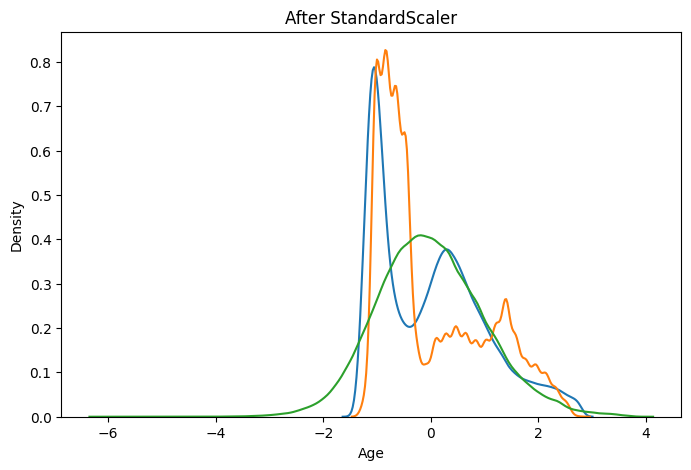

In [29]:
fig, (ax1) = plt.subplots(ncols=1, figsize=(8, 5))
ax1.set_title('After StandardScaler')

sns.kdeplot(data_num_data_s['Age'], ax=ax1)
sns.kdeplot(data_num_data_s['Vintage'], ax=ax1)
sns.kdeplot(data_num_data_s['Avg_Account_Balance'], ax=ax1);

In [30]:
# using label encoder to handle categorical variable
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data_cat_data = data_cat_data.apply(LabelEncoder().fit_transform)

In [31]:
# Storing cleaned data into 'data_new'

data_num_data_s.reset_index(drop=True, inplace=True)
data_cat_data.reset_index(drop=True, inplace=True)
data_new = pd.concat([data_num_data_s, data_cat_data], axis = 1)

In [32]:
# Splitting back the data into train and test based on iloc from the above shape of the dataset

train_new = data_new.iloc[:245725,]
test_new = data_new.iloc[245726:,]

print("Shape of train data:", train_new.shape)
print("Shape of test data:", test_new.shape)

Shape of train data: (245725, 9)
Shape of test data: (105311, 9)


In [33]:
#Checking again if there are any null values
train_new.isnull().sum()

Age                    0
Vintage                0
Avg_Account_Balance    0
Channel_Code           0
Credit_Product         0
Gender                 0
Is_Active              0
Occupation             0
Region_Code            0
dtype: int64

In [34]:
train_new.head()

Age   Vintage  Avg_Account_Balance  Channel_Code  Credit_Product  \
0  1.963311 -0.121384             0.202963             2               0   
1 -0.933890 -0.461633            -0.741453             0               0   
2  0.817906 -0.647223             0.767482             2               0   
3 -0.664383 -0.863745            -1.084337             0               0   
4 -0.933890 -0.430701            -0.062692             0               0   

   Gender  Is_Active  Occupation  Region_Code  
0       0          0           1           18  
1       0          0           2           27  
2       0          1           3           18  
3       1          0           2           20  
4       0          0           2           32

In [35]:
train_new.dtypes

Age                    float64
Vintage                float64
Avg_Account_Balance    float64
Channel_Code             int64
Credit_Product           int64
Gender                   int64
Is_Active                int64
Occupation               int64
Region_Code              int64
dtype: object

In [36]:
# Split the dataset into training and testing set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_new,Target,test_size=0.2,random_state=143)

## Base Modelling

### Decision Tree

In [37]:
# Importing Decision tree classifier from scikit-learn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

In [38]:
# Model training of decision tree
model_dt=DecisionTreeClassifier(max_depth=34)

model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=34)

In [39]:
# Prediction on splitted test data
y_pred_dt=model_dt.predict(X_test)

In [40]:
# Calculate accuracy
accuracy_tree = accuracy_score(y_test,y_pred_dt)
print("Accuracy:", accuracy_tree)

# Calculate precision
precision_tree = precision_score(y_test,y_pred_dt)
print("Precision:", precision_tree)

# Calculate recall
recall_tree = recall_score(y_test,y_pred_dt)
print("Recall:", recall_tree)

# Calculate F1 score
f1_tree = f1_score(y_test,y_pred_dt)
print("F1 Score:", f1_tree)

# Calculate confusion matrix
confusion_mat_tree = confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix:")
print(confusion_mat_tree)

Accuracy: 0.7907009868755723
Precision: 0.5582561400526898
Recall: 0.5635240627948872
F1 Score: 0.5608777322404371
Confusion Matrix:
[[32290  5198]
 [ 5088  6569]]


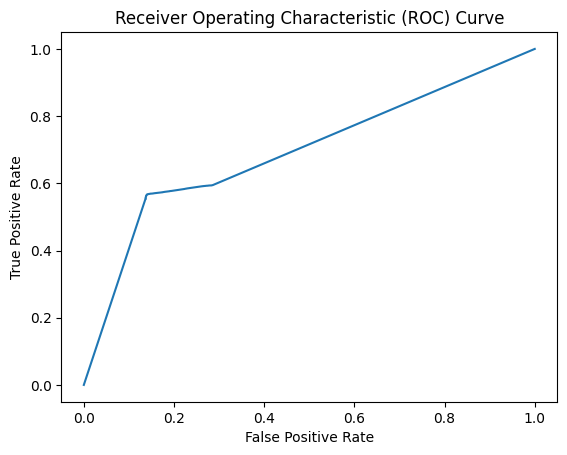

In [41]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

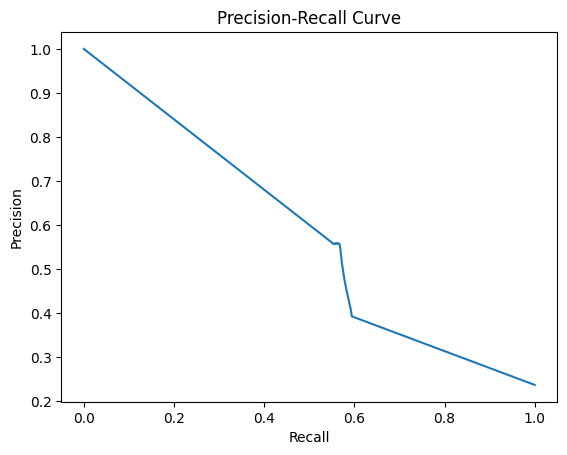

In [42]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model_dt.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
model_rf=RandomForestClassifier()

In [45]:
model_rf.fit(X_train,y_train)

<ipython-input-45-886240159eb4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,y_train)


RandomForestClassifier()

In [46]:
pred_train=model_rf.predict(X_test)

In [47]:
# Calculate accuracy
accuracy_forest = accuracy_score(y_test,pred_train)
print("Accuracy:", accuracy_forest)

# Calculate precision
precision_forest = precision_score(y_test,pred_train)
print("Precision:", precision_forest)

# Calculate recall
recall_forest = recall_score(y_test,pred_train)
print("Recall:", recall_forest)

# Calculate F1 score
f1_forest = f1_score(y_test,pred_train)
print("F1 Score:", f1_forest)

# Calculate confusion matrix
confusion_mat_forest = confusion_matrix(y_test,pred_train)
print("Confusion Matrix:")
print(confusion_mat_forest)

Accuracy: 0.8537389358022179
Precision: 0.7472065493970572
Recall: 0.5793943553229819
F1 Score: 0.652686509470429
Confusion Matrix:
[[35203  2285]
 [ 4903  6754]]


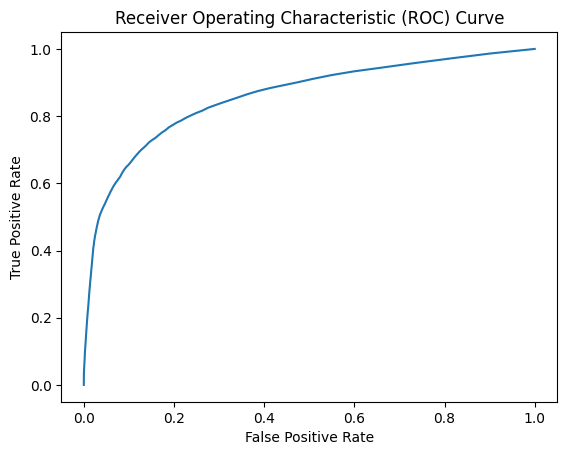

In [48]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

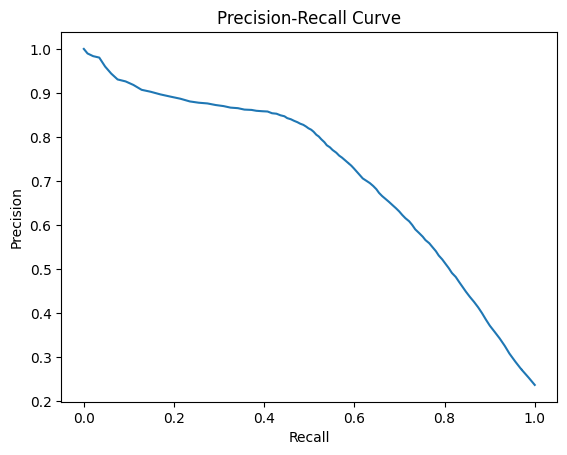

In [49]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

### XGBoost

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score,RocCurveDisplay, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [51]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [52]:
xgb_pred = xgb.predict(X_test)

xgb_auc = roc_auc_score(y_test, xgb_pred)
print("AUC:", xgb_auc)

# Calculate accuracy
accuracy_gbm1 = accuracy_score(y_test,xgb_pred)
print("Accuracy:", accuracy_gbm1)

# Calculate precision
precision_gbm1 = precision_score(y_test,xgb_pred)
print("Precision:", precision_gbm1)

# Calculate recall
recall_gbm1 = recall_score(y_test,xgb_pred)
print("Recall:", recall_gbm1)

# Calculate F1 score
f1_gbm1 = f1_score(y_test,xgb_pred)
print("F1 Score:", f1_gbm1)

# Calculate confusion matrix
confusion_mat_gbm1 = confusion_matrix(y_test,xgb_pred)
print("Confusion Matrix:")
print(confusion_mat_gbm1)

AUC: 0.7570245623490999
Accuracy: 0.8607589785329128
Precision: 0.792324508136993
Recall: 0.5596637213691344
F1 Score: 0.6559750640993415
Confusion Matrix:
[[35778  1710]
 [ 5133  6524]]


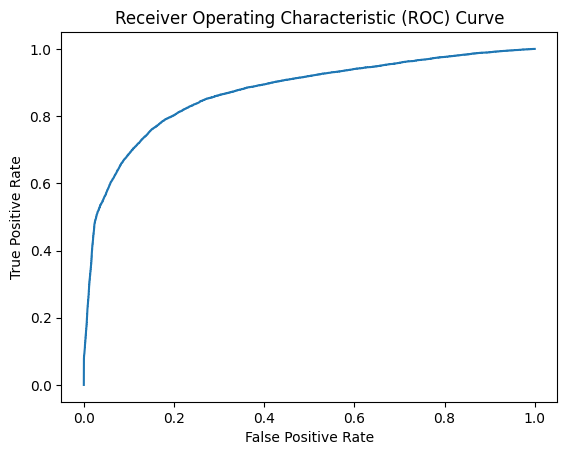

In [53]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

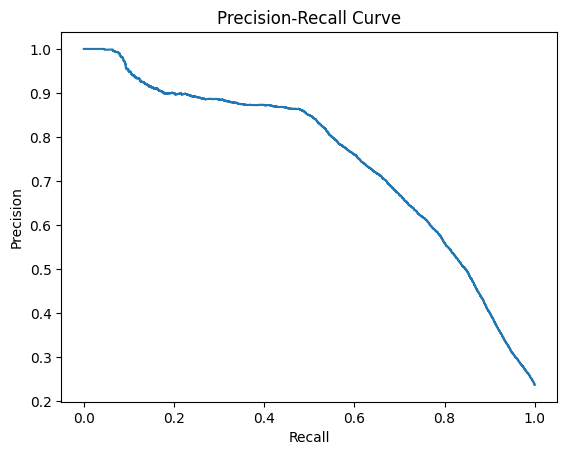

In [54]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


## Model performance Improvement

### Sampling technique

Let's start with handelling class imbalance with SMOTE

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(train_new,Target)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=143, stratify=y_sm)

### Decision Tree

In [57]:
# Model training of decision tree
model_dt=DecisionTreeClassifier(max_depth=34)

In [58]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=34)

In [59]:
# Prediction on splitted test data
y_pred_dt=model_dt.predict(X_test)

In [60]:
# Calculate accuracy
accuracy_tree = accuracy_score(y_test,y_pred_dt)
print("Accuracy:", accuracy_tree)

# Calculate precision
precision_tree = precision_score(y_test,y_pred_dt)
print("Precision:", precision_tree)

# Calculate recall
recall_tree = recall_score(y_test,y_pred_dt)
print("Recall:", recall_tree)

# Calculate F1 score
f1_tree = f1_score(y_test,y_pred_dt)
print("F1 Score:", f1_tree)

# Calculate confusion matrix
confusion_mat_tree = confusion_matrix(y_test,y_pred_dt)
print("Confusion Matrix:")
print(confusion_mat_tree)

Accuracy: 0.8564988329443147
Precision: 0.8537883200084715
Recall: 0.8603249126363806
F1 Score: 0.8570441530141774
Confusion Matrix:
[[31965  5523]
 [ 5236 32251]]


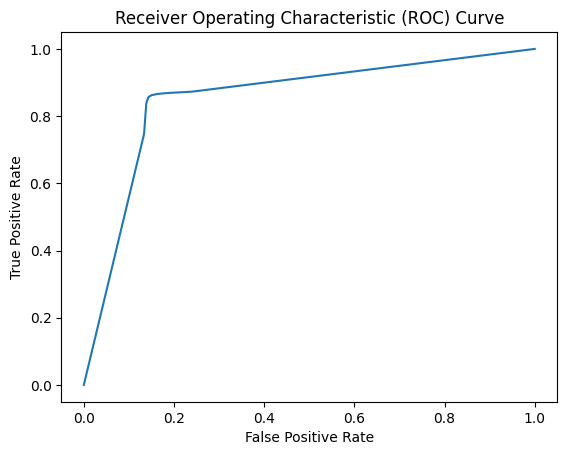

In [61]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_dt.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

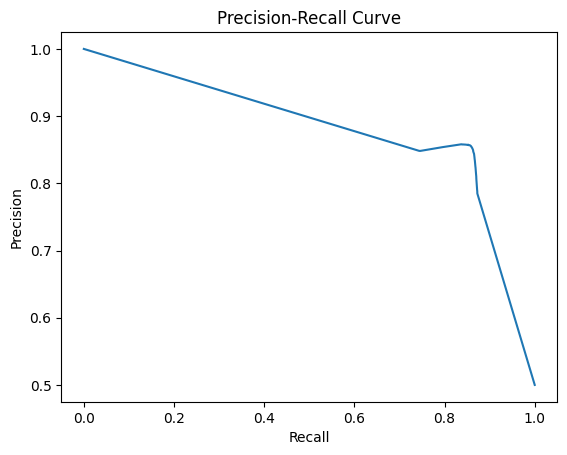

In [62]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model_dt.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


### Random Forest

In [63]:
model_rf=RandomForestClassifier()

model_rf.fit(X_train,y_train)

<ipython-input-63-214401b3f515>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,y_train)


RandomForestClassifier()

In [64]:
pred_train=model_rf.predict(X_test)

In [65]:
# Calculate accuracy
accuracy_forest = accuracy_score(y_test,pred_train)
print("Accuracy:", accuracy_forest)

# Calculate precision
precision_forest = precision_score(y_test,pred_train)
print("Precision:", precision_forest)

# Calculate recall
recall_forest = recall_score(y_test,pred_train)
print("Recall:", recall_forest)

# Calculate F1 score
f1_forest = f1_score(y_test,pred_train)
print("F1 Score:", f1_forest)

# Calculate confusion matrix
confusion_mat_forest = confusion_matrix(y_test,pred_train)
print("Confusion Matrix:")
print(confusion_mat_forest)

Accuracy: 0.8933377792597532
Precision: 0.8993770314192849
Recall: 0.8857737348947635
F1 Score: 0.8925235528915291
Confusion Matrix:
[[33773  3715]
 [ 4282 33205]]


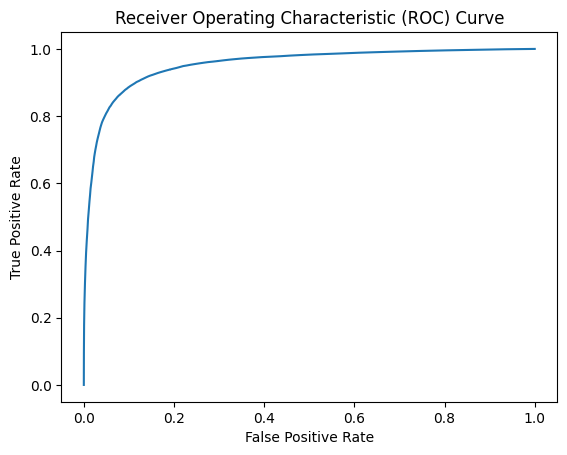

In [66]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

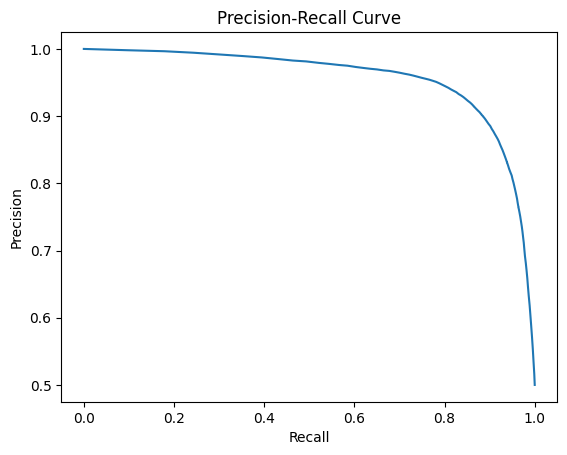

In [67]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model_rf.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


### XGBoost

In [68]:
#Fitting XGB model on the
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [69]:
xgb_pred = xgb.predict(X_test)

xgb_auc = roc_auc_score(y_test, xgb_pred)
print("AUC:", xgb_auc)

# Calculate accuracy
accuracy_gbm1 = accuracy_score(y_test,xgb_pred)
print("Accuracy:", accuracy_gbm1)

# Calculate precision
precision_gbm1 = precision_score(y_test,xgb_pred)
print("Precision:", precision_gbm1)

# Calculate recall
recall_gbm1 = recall_score(y_test,xgb_pred)
print("Recall:", recall_gbm1)

# Calculate F1 score
f1_gbm1 = f1_score(y_test,xgb_pred)
print("F1 Score:", f1_gbm1)

# Calculate confusion matrix
confusion_mat_gbm1 = confusion_matrix(y_test,xgb_pred)
print("Confusion Matrix:")
print(confusion_mat_gbm1)

AUC: 0.9043276491348983
Accuracy: 0.9043281093697899
Precision: 0.934297994269341
Recall: 0.8698215381332195
F1 Score: 0.9009076215342534
Confusion Matrix:
[[35195  2293]
 [ 4880 32607]]


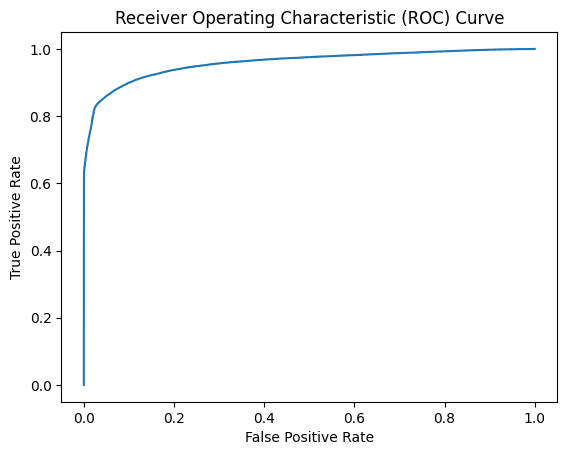

In [70]:

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

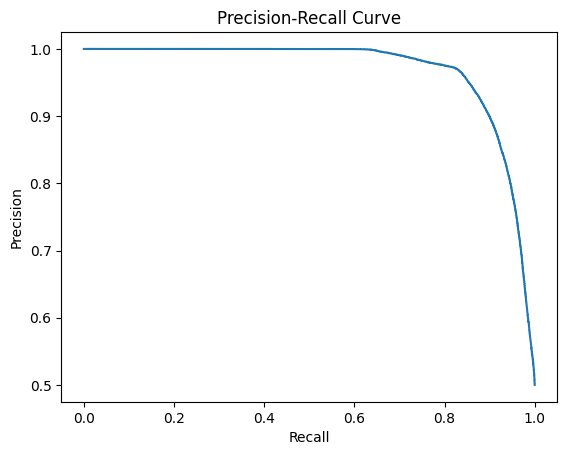

In [71]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, xgb.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

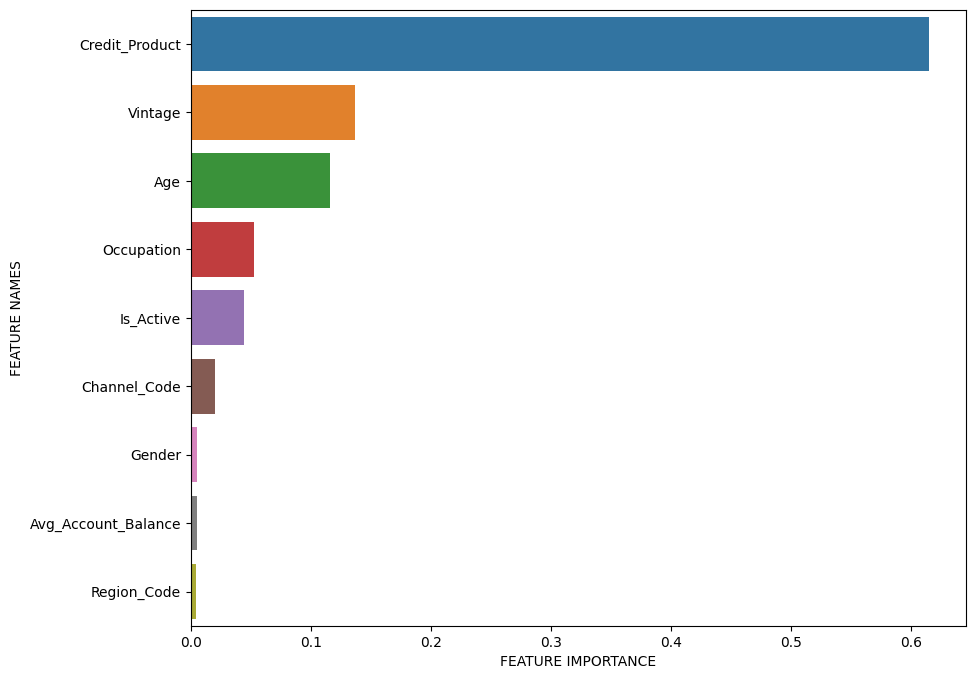

In [72]:
feature_importance = np.array(xgb.feature_importances_)
feature_names = np.array(X_train.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()

### Hyperparameter Tuning

Lets see if we can improve the performance more by hyperparameter tuning

In [73]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.7 MB/s eta 0:00:00


In [74]:
import optuna
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score,train_test_split , StratifiedKFold

### Decision Tree

In [75]:
def objective(trial):

    #n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1,100))
    clf = DecisionTreeClassifier(max_depth=max_depth)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)
    return cross_val_score(clf, X_train, y_train,n_jobs=2, cv=cv,scoring='roc_auc').mean()

study = optuna.create_study(direction='maximize',study_name='Decision Trees')
study.optimize(objective, n_trials=15)

[I 2023-06-26 01:47:25,500] A new study created in memory with name: Decision Trees
[I 2023-06-26 01:47:42,572] Trial 0 finished with value: 0.9140566588667006 and parameters: {'max_depth': 14}. Best is trial 0 with value: 0.9140566588667006.
[I 2023-06-26 01:47:58,919] Trial 1 finished with value: 0.8469379618532038 and parameters: {'max_depth': 85}. Best is trial 0 with value: 0.9140566588667006.
[I 2023-06-26 01:48:05,844] Trial 2 finished with value: 0.906150201760094 and parameters: {'max_depth': 17}. Best is trial 0 with value: 0.9140566588667006.
[I 2023-06-26 01:48:15,393] Trial 3 finished with value: 0.8465778424800607 and parameters: {'max_depth': 82}. Best is trial 0 with value: 0.9140566588667006.
[I 2023-06-26 01:48:25,599] Trial 4 finished with value: 0.8465243816557262 and parameters: {'max_depth': 57}. Best is trial 0 with value: 0.9140566588667006.
[I 2023-06-26 01:48:35,363] Trial 5 finished with value: 0.846737399722872 and parameters: {'max_depth': 92}. Best is tria

In [76]:
trial = study.best_trial
print('## best_value -->',trial.value)
print("## best_parameters -->",trial.params)

## best_value --> 0.9140566588667006
## best_parameters --> {'max_depth': 14}


In [78]:
model_dt1=DecisionTreeClassifier(max_depth=14)

model_dt1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=14)

In [80]:
# Prediction on splitted test data
y_pred_dt1=model_dt1.predict(X_test)

In [81]:
# Calculate accuracy
accuracy_tree = accuracy_score(y_test,y_pred_dt1)
print("Accuracy:", accuracy_tree)

# Calculate precision
precision_tree = precision_score(y_test,y_pred_dt1)
print("Precision:", precision_tree)

# Calculate recall
recall_tree = recall_score(y_test,y_pred_dt1)
print("Recall:", recall_tree)

# Calculate F1 score
f1_tree = f1_score(y_test,y_pred_dt1)
print("F1 Score:", f1_tree)

# Calculate confusion matrix
confusion_mat_tree = confusion_matrix(y_test,y_pred_dt1)
print("Confusion Matrix:")
print(confusion_mat_tree)

Accuracy: 0.8611537179059686
Precision: 0.88866879108891
Recall: 0.8257529276815962
F1 Score: 0.8560564159292036
Confusion Matrix:
[[33610  3878]
 [ 6532 30955]]


### Random Forest

In [82]:
def objective(trial):

    n_estimators = trial.suggest_int('n_estimators', 2, 200)
    max_depth = int(trial.suggest_int('max_depth', 1, 40))
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    cv=StratifiedKFold(n_splits=5,random_state=42,shuffle=True)

    return cross_val_score(clf, X_train, y_train,
           n_jobs=2, cv=cv,scoring='roc_auc').mean()

In [83]:
study = optuna.create_study(direction='maximize',study_name='Random Forest')
study.optimize(objective, n_trials=10)

[I 2023-06-26 01:55:05,495] A new study created in memory with name: Random Forest
[I 2023-06-26 01:57:32,938] Trial 0 finished with value: 0.897827316110873 and parameters: {'n_estimators': 117, 'max_depth': 9}. Best is trial 0 with value: 0.897827316110873.
[I 2023-06-26 01:59:29,523] Trial 1 finished with value: 0.9170014255469102 and parameters: {'n_estimators': 76, 'max_depth': 13}. Best is trial 1 with value: 0.9170014255469102.
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[I 2023-06-26 02:02:54,841] Trial 2 finished with value: 0.9479118403001484 and parameters: {'n_estimators': 95, 'max_depth': 28}. Best is trial 2 with value: 0.9479118403001484.
[I 2023-06-26 02:04:29,245] Trial 3 finished with value: 0.9313147595208772 and parameters: {'n_estimators': 53, 'max_depth': 17}. Bes

In [84]:
trial = study.best_trial
print('## best_values -->',trial.value)
print("## best_parameters -->",trial.params)

## best_values --> 0.9488644973178312
## best_parameters --> {'n_estimators': 132, 'max_depth': 34}


In [85]:
model_rf=RandomForestClassifier(n_estimators=132,max_depth=34)

In [87]:
model_rf.fit(X_train,y_train)

<ipython-input-87-886240159eb4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,y_train)


RandomForestClassifier(max_depth=34, n_estimators=132)

In [88]:
pred_train1=model_rf.predict(X_test)

In [89]:
# Calculate accuracy
accuracy_forest1 = accuracy_score(y_test,pred_train1)
print("Accuracy:", accuracy_forest1)

# Calculate precision
precision_forest1 = precision_score(y_test,pred_train1)
print("Precision:", precision_forest1)

# Calculate recall
recall_forest1 = recall_score(y_test,pred_train1)
print("Recall:", recall_forest1)

# Calculate F1 score
f1_forest1 = f1_score(y_test,pred_train1)
print("F1 Score:", f1_forest1)

# Calculate confusion matrix
confusion_mat_forest1 = confusion_matrix(y_test,pred_train1)
print("Confusion Matrix:")
print(confusion_mat_forest1)

Accuracy: 0.8937112370790263
Precision: 0.8976023706896552
Recall: 0.8888147891268974
F1 Score: 0.8931869663704478
Confusion Matrix:
[[33687  3801]
 [ 4168 33319]]


### XGBoost

In [47]:
import xgboost as xgb

def objective_xgb(trial):
    n_estimators = trial.suggest_int('n_estimators', 2, 500)
    max_depth = trial.suggest_int('max_depth', 2, 50)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
    subsample = trial.suggest_loguniform('subsample', 0.1, 1)
    colsample_bytree = trial.suggest_loguniform('colsample_bytree', 0.1, 1)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 0.1, 10)
    reg_lambda = trial.suggest_loguniform('reg_lambda', 0.1, 10)

    clf = xgb.XGBClassifier(n_estimators=n_estimators, max_depth=max_depth,
                            learning_rate=learning_rate, subsample=subsample,
                            colsample_bytree=colsample_bytree, reg_alpha=reg_alpha,
                            reg_lambda=reg_lambda)

    cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
    return cross_val_score(clf, X_train, y_train, n_jobs=2, cv=cv, scoring='roc_auc').mean()

study_xgb = optuna.create_study(direction='maximize', study_name="XGBoost")
study_xgb.optimize(objective_xgb, n_trials=10)


[I 2023-06-25 20:32:03,103] A new study created in memory with name: XGBoost
<ipython-input-47-b8f44b24e097>:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.001, 1)
<ipython-input-47-b8f44b24e097>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  subsample = trial.suggest_loguniform('subsample', 0.1, 1)
<ipython-input-47-b8f44b24e097>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  colsample_bytree = trial.suggest_loguniform('colsample_bytree', 0.1, 1)

In [48]:
trial_xgbm= study_xgb.best_trial
print("## Accuracy --> ",trial_xgbm.value)
print("## Best parameters --> ",trial_xgbm.params)

## Accuracy -->  0.9575419738590227
## Best parameters -->  {'n_estimators': 373, 'max_depth': 33, 'learning_rate': 0.10945712816283291, 'subsample': 0.4856452880402202, 'colsample_bytree': 0.42111230023736274, 'reg_alpha': 4.835189601207337, 'reg_lambda': 0.3388362629913343}


In [49]:
model_xgbm= XGBClassifier(**trial_xgbm.params)
model_xgbm.fit(X_train,y_train,eval_metric="auc",eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=400)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-auc:0.82669
[247]	validation_0-auc:0.95920


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.42111230023736274, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.10945712816283291,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=33, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=373, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
xgb_pred = model_xgbm.predict(X_test)

xgb_auc = roc_auc_score(y_test, xgb_pred)
print("AUC:", xgb_auc)

# Calculate accuracy
accuracy_gbm1 = accuracy_score(y_test,xgb_pred)
print("Accuracy:", accuracy_gbm1)

# Calculate precision
precision_gbm1 = precision_score(y_test,xgb_pred)
print("Precision:", precision_gbm1)

# Calculate recall
recall_gbm1 = recall_score(y_test,xgb_pred)
print("Recall:", recall_gbm1)

# Calculate F1 score
f1_gbm1 = f1_score(y_test,xgb_pred)
print("F1 Score:", f1_gbm1)

# Calculate confusion matrix
confusion_mat_gbm1 = confusion_matrix(y_test,xgb_pred)
print("Confusion Matrix:")
print(confusion_mat_gbm1)

AUC: 0.9064349182805623
Accuracy: 0.9064354784928309
Precision: 0.9437066806453491
Recall: 0.8644330034411929
F1 Score: 0.9023320570831883
Confusion Matrix:
[[35555  1933]
 [ 5082 32405]]


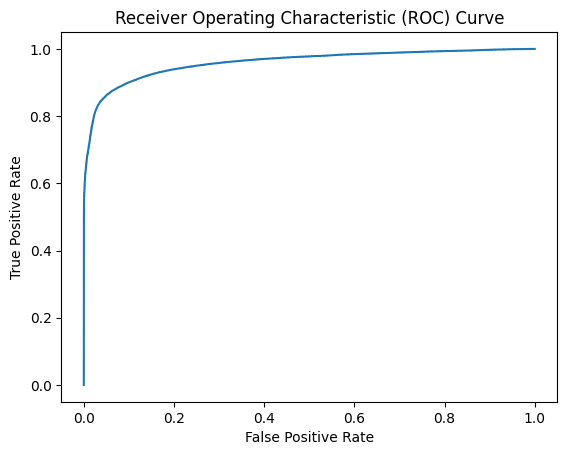

In [ ]:
from sklearn.metrics import roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, model_xgbm.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr)
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

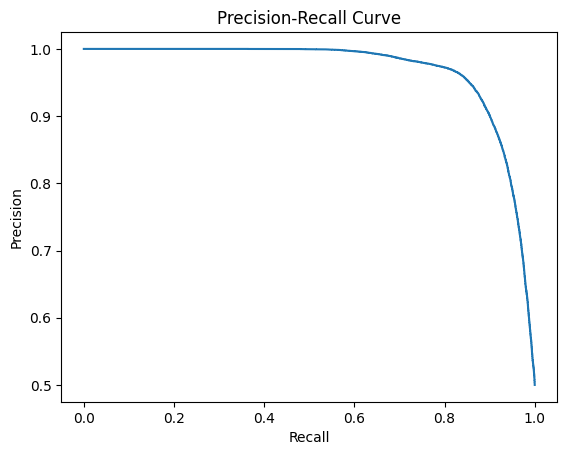

In [ ]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, model_xgbm.predict_proba(X_test)[:, 1])
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()